## **Name : Sharada Gajjala**

-----------------------------------------------------------------

### grip20-Task1

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [22]:
#importing all libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#data visualization
%matplotlib inline
import seaborn as scn

In [23]:
#Load the data 
df=pd.read_csv('./No.of.Hours.csv')

In [24]:
#display first values in the data(df)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


- Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

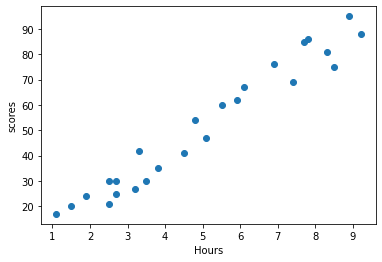

In [25]:
#plotting the distribution of scores
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('scores')
plt.show()

- Hece,there is a positive relation b/w Hours and Scores

## SKlearn

In [28]:
 from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression()

In [30]:
df.isnull().sum()#checking for any null values

Hours     0
Scores    0
dtype: int64

In [31]:

#splitting the data into independent and dependent
x=df.iloc[:,:1]#all rows in first column independent
y=df.iloc[:,-1]#all rows in last column dependent

In [34]:
x.shape,y.shape# check for shape

((25, 1), (25,))

In [35]:
#we will train the 80% data and test the 20% data
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2,random_state=0)

In [36]:
model.fit(x_train,y_train)
print('Model fitted successfully')

Model fitted successfully


In [37]:
model.intercept_,   model.coef_#slope of the line

(2.018160041434683, array([9.91065648]))

In [38]:
y_pred=model.predict(x)


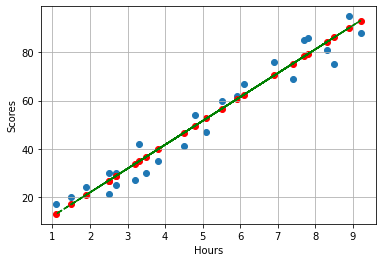

In [39]:
#plotting the x and y_pred values
plt.scatter(x,y)
plt.plot(x,y_pred,'g--')
plt.scatter(x,y_pred,color='red')
plt.xlabel('Hours'),plt.ylabel('Scores')
plt.grid()
plt.show()

In [41]:
#if the Hours is 9.25  what could be score
test=np.array([[9.25]])#we need to reshape the column and pass that value to the model predict
print(test.shape)
res=model.predict(test)
res

(1, 1)


array([93.69173249])

In [42]:
# so, if the Hours is 9.25/day ,the distance(y_pred) could be 93.69 score

### Evaluating the model
- The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different   algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. 

In [43]:
# we have residual Analysis,SSE,MSE with this also we can evaluate model.

In [45]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y, y_pred))

Mean Absolute Error: 4.986053347144891


In [46]:
e=y-y_pred# residual error

In [47]:
from scipy import stats

### shapiro wiki test will give the p-value for normal distribution
- H0:p>0.05 --Normal
- H1:p<0.05--Not Normal


In [21]:
stats.shapiro(e)#shariro wiki test

ShapiroResult(statistic=0.8954722285270691, pvalue=0.01464009564369917)

###  **Hence error is not normally distributed.Model DID'T capture information** here p value <0.014

##  If any remarks please let me know.
### Thank u